# Práctica 2
Resolver ejercicios de:
+ 1_aproximacion_a_derivadas_e_integrales
+ 0_definiciones_generales
+ 1_ecuaciones_lineales

## Ejercicios de Aproximación a Derivadas e Integrales:
### Aproximación a una función por el teorema de Taylor:
Ejercicio: Graficar la funcón y los polinomios constante, lineal y cuadrático en una sola gráfica con matplotlib en el intervalo $[1,2]$. ¿Cuánto es la aproximación de los polinomios en x=1.9? Calcula el error relativo de tus aproximaciones.

La función es $\frac{1}{x}$ : <br>
Aproximemos a la función $\frac{1}{x}$ en el intervalo $[1,2]$ con polinomios de Taylor de orden $n$, con $n \in \{0,1,2\}$ con centro en $x_0=1.5$. Los polinomios de Taylor son:

$$P_0(x) = f(x_0) = \frac{2}{3} \quad \text{(constante)}$$

$$P_1(x) = f(x_0) + f^{(1)}(x_0)(x-x_0) = \frac{2}{3} - \frac{1}{x_0^2}(x-x_0) \quad \text{(lineal)}$$

$$P_2(x) = f(x_0) + f^{(1)}(x_0)(x-x_0) + \frac{f^{(2)}(x_0)(x-x_0)^2}{2} = \frac{2}{3} - \frac{1}{x_0^2}(x-x_0) + \frac{2}{x_0^3}(x-x_0)^2 \quad \text{(cuadrático)}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

a = lambda X: 1/X
x_0 = 1.5
x = 1.9
def funcion_constante(x_0):
    return 2/3


def funcion_lineal(x_0,x):
    funlin = a(x_0)-((1/(x_0**2))*(x-x_0))
    return funlin


def funcion_cuadratica(x_0,x):
    funcuad = a(x_0)-((1/(x_0**2))*(x-x_0))+((2/(x**3))*((x-x_0)**2))
    return funcuad


In [2]:
from numpy import ones,append,arange,array
equises = arange(1.0,2.01,0.01)
#print(equises)

ysconstante = ones(len(equises))
i = 0
#print (len(equises))

ysconstante = ysconstante * funcion_constante(1.5)


#print(ysconstante)

ysLineal = []

i = 0
while i<len(equises):
    ysLineal.append(funcion_lineal(1.5,equises[i]))
    i = i+1

#print(ysLineal)


ysCuadratica = []

i = 0
while i<len(equises):
    ysCuadratica.append(funcion_cuadratica(1.5,equises[i]))
    i = i+1

#print(ysCuadratica)

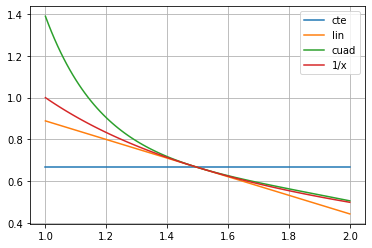

In [3]:
#plt.plot(equises,ysconstante,":",equises,ysLineal,"o-",equises,ysCuadratica,"^-",equises,a(equises))
plt.plot(equises,ysconstante,equises,ysLineal,equises,ysCuadratica,equises,a(equises))

plt.legend(("cte","lin","cuad","1/x"),loc = 0) #Agregar leyendas en loc. 3
plt.grid(True) #Agregar un grid de coordenadas
plt.show() #Mostrar la gráfica en pantalla

In [14]:
plt.savefig("grafica_de_prueba1.png",format="png") #Guardar la gráfica en formato png

input("\nPress return to exit")


Press return to exit 


''

<Figure size 432x288 with 0 Axes>

**¿Cuánto es la aproximación de los polinomios en x = 1.9?** Calcular el error relativo de las aproximaciones

In [15]:
valorReal= a(1.9)
print("el valor original es : ",valorReal)

el valor original es :  0.5263157894736842


In [16]:
constanteResultado = a(1.5)
linealResultado = funcion_lineal(1.5,1.9)
cuadraticoResultado = funcion_cuadratica(1.5,1.9)

print("el valor constante es : ",constanteResultado)
print("el valor lineal es : ",linealResultado)
print("el valor cuadrático es : ",cuadraticoResultado)

el valor constante es :  0.6666666666666666
el valor lineal es :  0.48888888888888893
el valor cuadrático es :  0.5355429200887722


In [17]:
#la funcion del error puede definirse como:
def error_relativo(valorReal, pronosticado):
    return abs(pronosticado - valorReal)/abs(valorReal)

erRelCte = error_relativo(valorReal,constanteResultado)
erRelLin = error_relativo(valorReal,linealResultado)
erRelCuad = error_relativo(valorReal,cuadraticoResultado)


print("el error relativo constante es : ",erRelCte)
print("el error relativo lineal es : ",erRelLin)
print("el error relativo cuadrático es : ",erRelCuad)

el error relativo constante es :  0.26666666666666666
el error relativo lineal es :  0.07111111111111099
el error relativo cuadrático es :  0.01753154816866732


<br> <br>
**Ejercicio: realizar una gráfica de log(error relativo) vs log(h) (h en el eje horizontal) para aproximar la segunda derivada de $f(x)=e^{-x}$ en $x=1$ con $h\in \{10^{-16},10^{-14},...,10^{-1}\}$ y diferencias hacia delante. Valor a aproximar: $f^{(2)}(1) = e^{-1}$**. Usar:

$$\frac{d^2f(x)}{dx} \approx \frac{f(x+2h)-2f(x+h)+f(x)}{h^2}$$

In [18]:
import dif_hacia_delante
import numpy as np
import math
import matplotlib.pyplot as plt

def error_relativo(valorReal, pronosticado):
    return abs(pronosticado - valorReal)/abs(valorReal)

#equises = np.arange(1.0,2.01,0.01)
#print(equises)


In [19]:
func = lambda x: np.exp(-x)
x = 1
valorReal = func(-x)
print(valorReal)

2.718281828459045


In [20]:
objetivo = math.exp(-x)
objetivo_df = -math.exp(-x)

Potenciahs = np.arange(-16,0,1)
#print("Para ver los valores de las potencias: \n",Potenciahs)

hs = np.power(10.0,Potenciahs)

#print("Para ver el valor que toman las h´s: \n",hs)

aprox1adiv=dif_hacia_delante.aprox_derivada_delante(x,func,hs)
print ("Aprox 2a derivada: \n",aprox1adiv)
#dif_hacia_delante.aprox_derivada_delante(x,func,hs)
aprox2adiv=dif_hacia_delante.aprox_segunda_derivada_delante(x,func,hs)
print ("Aprox 2a derivada: \n",aprox2adiv)
#dif_hacia_delante.aprox_segunda_derivada_delante(x,func,hs)

Aprox 2a derivada: 
 [ 0.         -0.44408921 -0.3663736  -0.36748382 -0.36792791 -0.36787795
 -0.36787962 -0.3678795  -0.36787944 -0.36787942 -0.36787926 -0.3678776
 -0.36786105 -0.36769556 -0.36604616 -0.35008357]
Aprox 2a derivada: 
 [-1.11022302e+16  1.66533454e+14 -5.55111512e+11 -1.11022302e+10
  1.11022302e+08 -5.55111512e+05  0.00000000e+00  1.11022302e+02
 -5.55111512e-01  3.77475828e-01  3.67816888e-01  3.67876285e-01
  3.67842656e-01  3.67511776e-01  3.64222015e-01  3.33148569e-01]


In [21]:
df_aprox = dif_hacia_delante.aprox_derivada_delante(x,func,hs)
ddf_aprox = dif_hacia_delante.aprox_segunda_derivada_delante(x,func,hs)

In [22]:
err_df = error_relativo(objetivo_df,df_aprox)
err_ddf = error_relativo(objetivo,ddf_aprox)

In [23]:
err_df

array([1.00000000e+00, 2.07159629e-01, 4.09330579e-03, 1.07540671e-03,
       1.31752917e-04, 4.05254169e-06, 4.74306916e-07, 1.72517009e-07,
       8.55693534e-09, 4.92985728e-08, 5.00021799e-07, 4.99998093e-06,
       4.99983334e-05, 4.99833375e-04, 4.98337492e-03, 4.83741804e-02])

In [24]:
err_ddf

array([3.01789907e+16, 4.52684861e+14, 1.50894954e+12, 3.01789907e+10,
       3.01789906e+08, 1.50895054e+06, 1.00000000e+00, 3.00789907e+02,
       2.50894954e+00, 2.60856849e-02, 1.70036991e-04, 8.57939030e-06,
       9.99915532e-05, 9.99417070e-04, 9.94191581e-03, 9.44082994e-02])

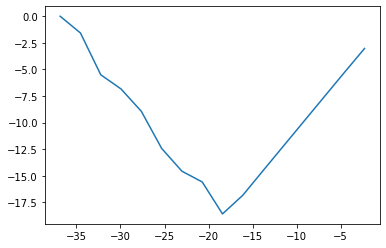

In [25]:
plt.plot(np.log(hs),np.log(err_df))

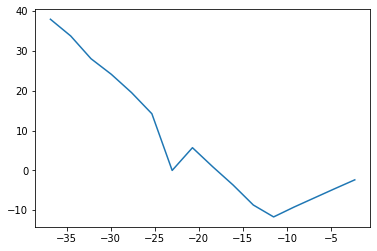

In [26]:
plt.plot(np.log(hs),np.log(err_ddf))

**Ejercicio: aproximar el valor de la integral $\displaystyle \int_0^{\pi}sin(x)dx = 2$ con reglas compuestas del rectángulo y trapecio con un número de subintervalos $n \in \{1,10,20,30,40 \}$ y hacer gráfica de la forma error relativo vs $n$ ($n$ en el eje horizontal)**

El método más simple de este tipo es hacer a la función interpoladora ser una función constante (un polinomio de orden cero) que pasa a través del punto (a,f(a)). Este método se llama la regla del rectángulo:

Modelo Rectangular: consistente en dividir el área que se desea encontrar en n subáreas en forma de rectángulos. Para el desarrollo del modelo se toman como referencia las siguientes variables: <br>
+ N: Número de subáreas en las cuales se divide el área a calcular<br>
+ dx : Ancho o base de cada subárea<br>
+ A: límite inferior defnido para el cálculo del área<br>
+ B: límite superior defnido para el cálculo del área.<br>
+ (2*i-1): es el número del sub-área que multiplicara dx/2.
<br><br>
Integración numérica de una función por el método de rectángulos: La integral defnida entre los puntos a y b de una función continua y acotada F(x) representa el área comprendida debajo de esa función. En ocasiones es necesario calcular integrales (áreas) de modo numérico, es decir, sin conocer la integral explícita de la función f(x). Existen varios posibles métodos para calcular esta área. Quizás el más sencillo sea sustituir el área por un conjunto de n sub-áreas donde cada sub-área semeja un pequeño rectángulo elemental de **base dx = (b-a)/n** y altura h. El área sería: <br>

área = h + dx. <br><br>

Donde h es el valor de la función calculada en el punto medio del área, f(a+dx/2) y dx es el ancho defnido para dicha sub-área. <br>

H será: Li + dx/2 . Teniendo en cuenta lo anterior, el área será:<br>

área = dx*f(Li+dx/2).<br>

Sabemos que la función Seno completa un ciclo entre 0 y pi, por lo que es éste el intervalo al que se calculará el área bajo la curva.

In [27]:
import numpy as np
import math
import matplotlib.pyplot as plt

equises = np.arange(0,41,1)
print(equises)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40]


In [28]:
#obteniendo puntos medios para la función seno:
#Regla del rectángulo:
def calcula_area_rect_seno(punto_inicial,punto_final,intervalos):
    base = (punto_final-punto_inicial)/intervalos
    punto_medio = 0
    contador = 0
    areaRect = 0
    inicio = punto_inicial
    fin = punto_inicial + base
    while contador<intervalos:
        punto_medio = (inicio+fin)/2
        altura = math.sin(punto_medio)
        areaRect = areaRect + (base*altura)
        inicio = fin
        fin = inicio + base
        contador = contador + 1
    return areaRect

def calcula_area_trapecio_seno(punto_inicial,punto_final,intervalos):
    base = (punto_final-punto_inicial)/intervalos
    contador = 0
    areaTrap = 0
    inicio = punto_inicial
    fin = punto_inicial + base
    while contador<intervalos:
        l1 = math.sin(inicio)
        l2 = math.sin(fin)
        areaTrap = areaTrap + (base*((l1+l2)/2))
        inicio = fin
        fin = inicio + base
        contador = contador + 1
    return areaTrap

def error_relativo(valorReal, pronosticado):
    return abs(pronosticado - valorReal)/abs(valorReal)

In [29]:
print("con 1 intervalo con regla del rectangulo: ",calcula_area_rect_seno(0,math.pi,1))
print("con 10 intervalos con regla del rectangulo: ",calcula_area_rect_seno(0,math.pi,10))
print("con 20 intervalos con regla del rectangulo: ",calcula_area_rect_seno(0,math.pi,20))
print("con 30 intervalos con regla del rectangulo: ",calcula_area_rect_seno(0,math.pi,30))
print("con 40 intervalos con regla del rectangulo: ",calcula_area_rect_seno(0,math.pi,40))

con 1 intervalo con regla del rectangulo:  3.141592653589793
con 10 intervalos con regla del rectangulo:  2.0082484079079745
con 20 intervalos con regla del rectangulo:  2.0020576482854167
con 30 intervalos con regla del rectangulo:  2.0009141446379624
con 40 intervalos con regla del rectangulo:  2.000514134394606


In [30]:
print("Se puede apreciar que conforme aumentan los intervalos, la aproximación resulta mejor, por lo que la función está correcta.")

Se puede apreciar que conforme aumentan los intervalos, la aproximación resulta mejor, por lo que la función está correcta.


Calculando con la regla del trapecio:

In [31]:
print("con 1 intervalo con regla del trapecio: ",calcula_area_trapecio_seno(0,math.pi,1))
print("con 10 intervalos con regla del trapecio: ",calcula_area_trapecio_seno(0,math.pi,10))
print("con 20 intervalos con regla del trapecio: ",calcula_area_trapecio_seno(0,math.pi,20))
print("con 30 intervalos con regla del trapecio: ",calcula_area_trapecio_seno(0,math.pi,30))
print("con 40 intervalos con regla del trapecio: ",calcula_area_trapecio_seno(0,math.pi,40))

con 1 intervalo con regla del trapecio:  1.9236706937217898e-16
con 10 intervalos con regla del trapecio:  1.9835235375094546
con 20 intervalos con regla del trapecio:  1.9958859727087146
con 30 intervalos con regla del trapecio:  1.9981719613436544
con 40 intervalos con regla del trapecio:  1.9989718104970657


In [32]:
x_reglas = np.array([1,10,20,30,40])
print(x_reglas)

[ 1 10 20 30 40]


In [33]:
tamaño = len(x_reglas)
print("tamaño: ",tamaño)

ys_trapecio = np.ones(tamaño)
ys_rectangulo = np.ones(tamaño)
print (ys_trapecio)
print (ys_rectangulo)
i = 0
while i<tamaño:
    ys_trapecio[i] = (calcula_area_trapecio_seno(0,math.pi,x_reglas[i]))
    i = i + 1

#print(ys_trapecio)

    
i = 0
while i<tamaño:
    ys_rectangulo[i] = (calcula_area_rect_seno(0,math.pi,x_reglas[i]))
    i = i + 1
    
print("trapecio: \n",ys_trapecio)
print("rectangulo: \n",ys_rectangulo)

tamaño:  5
[1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1.]
trapecio: 
 [1.92367069e-16 1.98352354e+00 1.99588597e+00 1.99817196e+00
 1.99897181e+00]
rectangulo: 
 [3.14159265 2.00824841 2.00205765 2.00091414 2.00051413]


In [34]:
def error_relativo(valorReal, pronosticado):
    return abs(pronosticado - valorReal)/abs(valorReal)

ys_errores_rectangulo = np.ones(tamaño)
ys_errores_trapecio = np.ones(tamaño)

i = 0
while i<tamaño:
    ys_errores_trapecio[i] = (error_relativo(2,ys_trapecio[i]))
    i = i + 1
    
i = 0
while i<tamaño:
    ys_errores_rectangulo[i] = (error_relativo(2,ys_rectangulo[i]))
    i = i + 1


print("Errores trapecio: \n",ys_errores_trapecio)
print("Errores rectangulo: \n",ys_errores_rectangulo)

Errores trapecio: 
 [1.00000000e+00 8.23823125e-03 2.05701365e-03 9.14019328e-04
 5.14094751e-04]
Errores rectangulo: 
 [5.70796327e-01 4.12420395e-03 1.02882414e-03 4.57072319e-04
 2.57067197e-04]


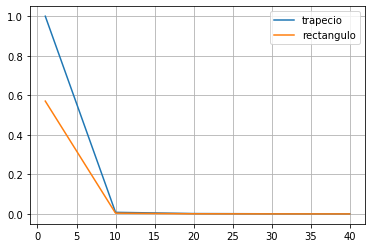

In [35]:
#graficando:
#plt.plot(equises,ysconstante,":",equises,ysLineal,"o-",equises,ysCuadratica,"^-",equises,a(equises))
plt.plot(x_reglas,ys_errores_trapecio,x_reglas,ys_errores_rectangulo)

plt.legend(("trapecio","rectangulo"),loc = 0) #Agregar leyendas en loc. 3
plt.grid(True) #Agregar un grid de coordenadas
plt.show() #Mostrar la gráfica en pantalla

# Cuadratura Gaussiana
## Gauss-Legendre
**Ejercicio: aproximar la integral de:**
        $$\displaystyle \int_0^1e^{-\frac{t^2}{2}}dt$$
**con cuadratura Gauss-Legendre con $n \in \{0,1,2,3,4\}$. Realizar gráfica de la forma error relativo vs $n$ ($n$ en el eje horizontal). Valor a aproximar: $.855624391892149$**

In [36]:
import numpy as np
import math
import gauss_legendre as gauleg
import matplotlib.pyplot as plt

In [37]:
funcion = lambda x: np.exp(-((x**2)/2))

In [38]:
n_cero = gauleg.calcula_gauss_legendre(0, 0, 1, funcion)
n_uno = gauleg.calcula_gauss_legendre(1, 0, 1, funcion)
n_dos = gauleg.calcula_gauss_legendre(2, 0, 1, funcion)
n_tres = gauleg.calcula_gauss_legendre(3, 0, 1, funcion)
n_cuatro = gauleg.calcula_gauss_legendre(4, 0, 1, funcion)

In [39]:
print("aproximación con n = 0: ",n_cero)
print("aproximación con n = 1: ",n_uno)
print("aproximación con n = 2: ",n_dos)
print("aproximación con n = 3: ",n_tres)
print("aproximación con n = 4: ",n_cuatro)

aproximación con n = 0:  0.8824969025845955
aproximación con n = 1:  0.8553145616837845
aproximación con n = 2:  0.8556263940426317
aproximación con n = 3:  0.8556243937941527
aproximación con n = 4:  0.8556248255858607


In [40]:
def error_relativo(valorReal, pronosticado):
    return abs(pronosticado - valorReal)/abs(valorReal)

In [41]:
valorReal_gauleg = 0.855624391892149
aprox_obtenida = np.array([n_cero,n_uno,n_dos,n_tres,n_cuatro])
print("Aproximaciones obtenidas: \n",aprox_obtenida)

Aproximaciones obtenidas: 
 [0.8824969  0.85531456 0.85562639 0.85562439 0.85562483]


In [42]:
error_relativo_gauleg = error_relativo(valorReal_gauleg,aprox_obtenida)
print("Vector de errores relativos: \n",error_relativo_gauleg)

Vector de errores relativos: 
 [3.14069011e-02 3.62110070e-04 2.33998762e-06 2.22294231e-09
 5.06873946e-07]


In [43]:
ns_gauleg = np.arange(0,5,1)
print("Vector de n´s (en el eje x): \n",ns_gauleg)

Vector de n´s (en el eje x): 
 [0 1 2 3 4]


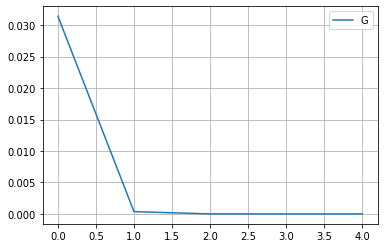

In [44]:
#graficando:
#plt.plot(equises,ysconstante,":",equises,ysLineal,"o-",equises,ysCuadratica,"^-",equises,a(equises))
plt.plot(ns_gauleg,error_relativo_gauleg)

plt.legend(("Gauss-Legendre"),loc = 0) #Agregar leyendas en loc. 3
plt.grid(True) #Agregar un grid de coordenadas
plt.show() #Mostrar la gráfica en pantalla

## Aproximación por Gauss-Hermite
**Ejercicio: aproximar las integrales: $$(2\pi\sigma^2)^{-\frac{1}{2}}\displaystyle \int_{-\infty}^\infty te^{\frac{-(t-\mu)^2}{2\sigma^2}}dt$$**

$$(2\pi\sigma^2)^{-\frac{1}{2}}\displaystyle \int_{-\infty}^\infty t^2e^{\frac{-(t-\mu)^2}{2\sigma^2}}dt$$

donde: $\sigma=0.25, \mu=0.15$ cuyos valores respectivamente son: $0.15, 0.085$ con cuadratura de Gauss-Hermite. Para lo anterior, realizar cambio de variable $x=\frac{t-\mu}{\sqrt{2\sigma^2}}, dt=\sqrt{2\sigma^2}dx$.

En la historia de estas reglas ya se han calculado los pesos y nodos para diferentes valores de los grados de los polinomios. A continuación se tiene la siguiente tabla para $n \in \{1,2,3,4\}$ y una integral definida en el intervalo $[-\infty,\infty]$:

| n | # (nodos + pesos) | pesos: $w_i, w_{i+1},\dots$                                                    | nodos:     $x_i, x_{i+1},\dots$                                              |
|---|-------------------|-----------------------------------------------------------|----------------------------------------------------------|
| 1 | 4                 | 0.886227,0.886227                                         | -0.707107,0.707107                                       |
| 2 | 6                 | 0.295409,1.181636,0.295409                                | -1.224745,0,1.224745                                     |
| 3 | 8                 | 0.0813128,0.804914,0.804914,0.0813128                     | -1.650680,-0.524648,0.524648,1.650680                    |
| 4 | 10                | 0.0199532,0.0393619,0.945308,0.0393619,0.0199532          | -2.020183,-0.958572,0,0.958572,2.020183                  |
| 5 | 12                | 0.00453001,0.157067,0.724629,0.724629,0.157067,0.00453001 | -2.350605,-1.335849,-0.436077,0.436077,1.335849,2.350605 |

In [45]:
import numpy as np
import math
import gauss_hermite as gauherm
import matplotlib.pyplot as plt

In [46]:
#Lambda 1 y 2 salen de el cambio de variable
print ("primero se realizará la gráfica y la aproximación de la primer función")
funcion_gauherm_1 = lambda x: ((math.sqrt(2*math.pi*(0.25**2)))*((np.exp(-(x**2))))*((x*math.sqrt(2)*(0.25))+(0.15))*(math.sqrt(2*(0.25**2))))

primero se realizará la gráfica y la aproximación de la primer función


In [47]:
n_uno_gauherm_1 = gauherm.calcula_gauss_hermite(1, 0, 1, funcion_gauherm_1)
n_dos_gauherm_1 = gauherm.calcula_gauss_hermite(2, 0, 1, funcion_gauherm_1)
n_tres_gauherm_1 = gauherm.calcula_gauss_hermite(3, 0, 1, funcion_gauherm_1)
n_cuatro_gauherm_1 = gauherm.calcula_gauss_hermite(4, 0, 1, funcion_gauherm_1)
n_cinco_gauherm_1 = gauherm.calcula_gauss_hermite(5, 0, 1, funcion_gauherm_1)


In [48]:
print("aproximación Gauss-Hermite de la función 1 con n = 1: ",n_uno_gauherm_1)
print("aproximación Gauss-Hermite de la función 1 con n = 2: ",n_dos_gauherm_1)
print("aproximación Gauss-Hermite de la función 1 con n = 3: ",n_tres_gauherm_1)
print("aproximación Gauss-Hermite de la función 1 con n = 4: ",n_cuatro_gauherm_1)
print("aproximación Gauss-Hermite de la función 1 con n = 5: ",n_cinco_gauherm_1)

aproximación Gauss-Hermite de la función 1 con n = 1:  0.04079414539194498
aproximación Gauss-Hermite de la función 1 con n = 2:  0.04203495763930971
aproximación Gauss-Hermite de la función 1 con n = 3:  0.041887704687082083
aproximación Gauss-Hermite de la función 1 con n = 4:  0.02826841107818738
aproximación Gauss-Hermite de la función 1 con n = 5:  0.0419020805411425


In [49]:
def error_relativo(valorReal, pronosticado):
    return abs(pronosticado - valorReal)/abs(valorReal)

In [50]:
valorReal_gauherm_1 = 0.15
aprox_obtenida_gauherm_1 = np.array([n_uno_gauherm_1,n_dos_gauherm_1,n_tres_gauherm_1,n_cuatro_gauherm_1,n_cinco_gauherm_1])
print("Aproximaciones obtenidas: \n",aprox_obtenida_gauherm_1)

Aproximaciones obtenidas: 
 [0.04079415 0.04203496 0.0418877  0.02826841 0.04190208]


In [51]:
error_relativo_gauherm_1 = error_relativo(valorReal_gauherm_1,aprox_obtenida_gauherm_1)
print("Vector de errores relativos: \n",error_relativo_gauherm_1)

Vector de errores relativos: 
 [0.72803903 0.71976695 0.72074864 0.81154393 0.7206528 ]


In [52]:
ns_gauherm = np.arange(1,6,1)
print("Vector de n´s (en el eje x): \n",ns_gauherm)

Vector de n´s (en el eje x): 
 [1 2 3 4 5]


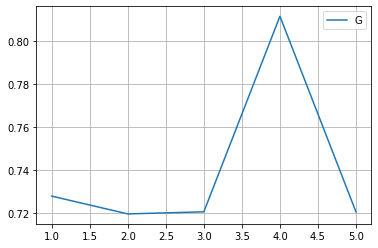

In [53]:
#graficando:
plt.plot(ns_gauherm,error_relativo_gauherm_1)

plt.legend(("Gauss-Hermite1"),loc = 0) #Agregar leyendas en loc. 0
plt.grid(True) #Agregar un grid de coordenadas
plt.show() #Mostrar la gráfica en pantalla

Ahora Aproximamos la segunda función...

In [54]:
import numpy as np
import math
import gauss_hermite as gauherm
import matplotlib.pyplot as plt

In [55]:
#Lambda 1 y 2 salen de el cambio de variable
print ("ahora se realizará la gráfica y la aproximación de la segunda función")
funcion_gauherm_2 = lambda x: ((math.sqrt(2*math.pi*(0.25**2)))*((np.exp(-(x**2))))*(((x*math.sqrt(2)*(0.25))+(0.15))**2)*(math.sqrt(2*(0.25**2))))

ahora se realizará la gráfica y la aproximación de la segunda función


In [56]:
n_uno_gauherm_2 = gauherm.calcula_gauss_hermite(1, 0, 1, funcion_gauherm_2)
n_dos_gauherm_2 = gauherm.calcula_gauss_hermite(2, 0, 1, funcion_gauherm_2)
n_tres_gauherm_2 = gauherm.calcula_gauss_hermite(3, 0, 1, funcion_gauherm_2)
n_cuatro_gauherm_2 = gauherm.calcula_gauss_hermite(4, 0, 1, funcion_gauherm_2)
n_cinco_gauherm_2 = gauherm.calcula_gauss_hermite(5, 0, 1, funcion_gauherm_2)


In [57]:
print("aproximación Gauss-Hermite de la función 2 con n = 1: ",n_uno_gauherm_2)
print("aproximación Gauss-Hermite de la función 2 con n = 2: ",n_dos_gauherm_2)
print("aproximación Gauss-Hermite de la función 2 con n = 3: ",n_tres_gauherm_2)
print("aproximación Gauss-Hermite de la función 2 con n = 4: ",n_cuatro_gauherm_2)
print("aproximación Gauss-Hermite de la función 2 con n = 5: ",n_cinco_gauherm_2)

aproximación Gauss-Hermite de la función 2 con n = 1:  0.013582579630701962
aproximación Gauss-Hermite de la función 2 con n = 2:  0.014081407147571048
aproximación Gauss-Hermite de la función 2 con n = 3:  0.01399712334355956
aproximación Gauss-Hermite de la función 2 con n = 4:  0.00933545781063205
aproximación Gauss-Hermite de la función 2 con n = 5:  0.01400829419364998


In [58]:
def error_relativo(valorReal, pronosticado):
    return abs(pronosticado - valorReal)/abs(valorReal)

In [59]:
valorReal_gauherm_2 = 0.085
aprox_obtenida_gauherm_2 = np.array([n_uno_gauherm_2,n_dos_gauherm_2,n_tres_gauherm_2,n_cuatro_gauherm_2,n_cinco_gauherm_2])
print("Aproximaciones obtenidas: \n",aprox_obtenida_gauherm_2)

Aproximaciones obtenidas: 
 [0.01358258 0.01408141 0.01399712 0.00933546 0.01400829]


In [60]:
error_relativo_gauherm_2 = error_relativo(valorReal_gauherm_2,aprox_obtenida_gauherm_2)
print("Vector de errores relativos: \n",error_relativo_gauherm_2)

Vector de errores relativos: 
 [0.84020495 0.83433639 0.83532796 0.89017108 0.83519654]


In [61]:
ns_gauherm = np.arange(1,6,1)
print("Vector de n´s (en el eje x): \n",ns_gauherm)

Vector de n´s (en el eje x): 
 [1 2 3 4 5]


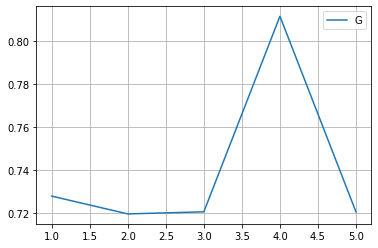

In [62]:
#graficando:
plt.plot(ns_gauherm,error_relativo_gauherm_1)

plt.legend(("Gauss-Hermite2"),loc = 0) #Agregar leyendas en loc. 0
plt.grid(True) #Agregar un grid de coordenadas
plt.show() #Mostrar la gráfica en pantalla

<br><br>
# Parte 2: Definiciones Generales de Álgebra Lineal
## Matrices Ortogonales
### Matriz de rotación en sentido contrario a las manecillas del reloj en el plano
Está dada por: <br>
$$R_{\theta} = \begin{bmatrix} cos(\theta) & -sen(\theta) \\\\ sen(\theta)& cos(\theta)\end{bmatrix}$$


**Ejercicio: usar esta matriz de rotación para rotar un ángulo de $\frac{\pi}{3}$ en sentido contrario a las manecillas del reloj al vector** $\left(\begin{array}{c}-3\\\\4\\\\\end{array}\right)$ 

In [63]:
import numpy as np
import math
import pprint

In [64]:
vector_rotar = np.array([-3,4])
print("El vector como vector renglon: \n",vector_rotar)

El vector como vector renglon: 
 [-3  4]


In [65]:
vector_rotar.reshape(2,1)

array([[-3],
       [ 4]])

creamos la matriz de rotación:

In [66]:
A_rotacion = np.array([[math.cos(math.pi/3),-math.sin(math.pi/3)],[math.sin(math.pi/3),math.cos(math.pi/3)]])
pprint.pprint(A_rotacion)

array([[ 0.5      , -0.8660254],
       [ 0.8660254,  0.5      ]])


Para rotar al vector tenemos que hacer la multiplicación de la matriz de rotación con el vector:

In [67]:
resultado_rotacion = A_rotacion@vector_rotar
print("el resultado del vector rotado es: ")
pprint.pprint(resultado_rotacion)

el resultado del vector rotado es: 
array([-4.96410162, -0.59807621])


### Matriz de reflexión de Householder
Está dada por: $$R_{H} = I - 2 \frac{uu^T}{u^Tu}$$ con $u \in \mathbb{R}^n -\{0\}$ y realiza la reflexión respecto al conjunto de vectores ortogonales a $u$. 

**Ejercicio: reflejar al vector $\left(\begin{array}{c}
   1\\\\1\\\\
   \end{array}
   \right)$ utilizando al vector $\left(\begin{array}{c}
   -\frac{4}{3}\\\\
   \frac{2}{3}\\\\
   \end{array}
   \right)$ para construir a $R_{H}$**.

In [68]:
import numpy as np
import math
import pprint

Primero creamos el vector a reflejar:

In [69]:
vector_reflejar = np.array([1,1])
vector_construir = np.array([-4/3,-2/3])
print("Imprimiendo el vector a reflejar: \n")
pprint.pprint(vector_reflejar)
print("Imprimiendo el vector de construcción: \n")
pprint.pprint(vector_construir)

Imprimiendo el vector a reflejar: 

array([1, 1])
Imprimiendo el vector de construcción: 

array([-1.33333333, -0.66666667])


Pondré ambos arreglos en el formato que tienen en el ejercicio:

In [70]:
vector_construir_T = np.transpose(vector_construir)
identidad_construir = np.identity(len(vector_construir))
print("Imprimiendo el vector a de construccion transpuesto: \n")
pprint.pprint(vector_construir_T)
print("Imprimiendo el vector identidad del tamaño del vector de construcción: \n")
pprint.pprint(identidad_construir)

Imprimiendo el vector a de construccion transpuesto: 

array([-1.33333333, -0.66666667])
Imprimiendo el vector identidad del tamaño del vector de construcción: 

array([[1., 0.],
       [0., 1.]])


In [71]:
RHMat = identidad_construir-2*((vector_construir@vector_construir_T)/(vector_construir_T@vector_construir))
print("calculando RH: \n",RHMat)

calculando RH: 
 [[-1. -2.]
 [-2. -1.]]


In [72]:
#Reflejando al vector:
vector_reflejado = vector_reflejar@RHMat
print("vector reflejado: \n",vector_reflejado)

vector reflejado: 
 [-3. -3.]


<br>
<br>

## Parte 3: 1_ecuaciones_lineales

**Ejercicio: resolver el ejercicio 3) anterior con la factorización QR del paquete `numpy` de la matriz A y verificar resultado**

3) Obtener los factores $P, L, U$ de la matriz $A$: $$A = \begin{bmatrix} 2& -1&2 \\ 1& 6& -1 \\ 1& 4& 1\end{bmatrix}$$ 

y utilizarlos para resolver $Ax = B$ con $$B=\begin{bmatrix}7 & -1\\13 & 6\\5 & 7\end{bmatrix}$$

In [73]:
import numpy as np
import pprint

#Inicializamos las matrices A y B: 
A = np.array([[2,-1,2], [1,6,-1], [1,4,1]])
B = np.array([[7,-1],[13,6],[5,7]])

En la factorización Q,R, Q es una matriz ortogonal y R es una matriz triangular superior. En comparación con la factorización LU, la factorización QR no requiere el uso de pivotes, pero si requiere aproximadamente el doble de operaciones. Por esta ineficiencia, la factorización QR no es usada como una herramienta de uso general, pero es muy usada cuando lo que se requiere es estabilidd (por ejemplo, solución de problemas de eigenvalue). El módulo numpy incluye la función qr que hace esta factorización:<br><br>

       Q,R = numpy.linalg.qr(A)
       
(Kiusalaas, pp. 102)

In [75]:
#Haciendo la fctorización Q,R:
Q,R = np.linalg.qr(A)

#imprinmiendo Q y R 
print("Q: \n",Q)
print("\n Q es una matriz ortogonal\n")
print("R: \n",R)
print("\n R es una matriz superior\n")

inversa_R = np.linalg.inv(R)
inversa_Q = Q.T

#de Rx = Qt*B se tiene que despejar x:
qt_por_b = inversa_Q@B
vector_X = inversa_R@qt_por_b

print("Verificamos que el resultado  de Ax sea igual a B (es decir, Ax=B)")
print("B : \n\n")
pprint.pprint(B)
print("\n\n")
print("Ax: \n")
pprint.pprint(A@vector_X)
#Detalle curioso: si hago import pprint no funciona el pprint, pero si lo hago como from pprint import pprint si funciona.
#si se hace el import como import pprint, se tiene que poner: pprint.pprint(), de lo contrario no funciona

Q: 
 [[-0.81649658  0.56354707 -0.12549116]
 [-0.40824829 -0.71724173 -0.56471022]
 [-0.40824829 -0.40985242  0.81569255]]

 Q es una matriz ortogonal

R: 
 [[-2.44948974 -3.26598632 -1.63299316]
 [ 0.         -6.5064071   1.43448345]
 [ 0.          0.          1.12942045]]

 R es una matriz superior

Verificamos que el resultado  de Ax sea igual a B (es decir, Ax=B)
B : 


array([[ 7, -1],
       [13,  6],
       [ 5,  7]])



Ax: 

array([[ 7., -1.],
       [13.,  6.],
       [ 5.,  7.]])


**Ejercicio: resolver los sistemas de ecuaciones lineales $Ax = b$ con la factorización P, LU y verificar resultado**

$$1)A = \left[\begin{array}{ccc}
0 &1& -1\\
-2 &4& -1\\
-2 &5& -4
\end{array}
\right],
b=
\left[\begin{array}{c}
3\\
1\\
-2
\end{array}
\right] 
$$



$$2)A \text{ como inciso 1) y } 
b=
\left[\begin{array}{c}
-5\\
7\\
0
\end{array}
\right] 
$$



$$3)A = \left[\begin{array}{cccc}
1 &2& 2\\
2 &5& 7\\
3 &6& 6
\end{array}
\right],
b=
\left[\begin{array}{c}
0\\
0\\
0
\end{array}
\right] 
$$

#### 1) Resolviendo para el sistema:

$$1)A = \left[\begin{array}{ccc}
0 &1& -1\\
-2 &4& -1\\
-2 &5& -4
\end{array}
\right],
b=
\left[\begin{array}{c}
3\\
1\\
-2
\end{array}
\right] 
$$



In [76]:
import scipy
import scipy.linalg 
import numpy as np
import pprint

In [77]:
A = scipy.array([[0,1,-1], [-2,4,-1], [-2,5,-4]])
B = scipy.array([[3,1,-2]])
P, L, U = scipy.linalg.lu(A)

#Matrices de entrada
print('A:')
pprint.pprint(A)
print('B:')
pprint.pprint(B)

#Poner a B como vector columna:
B = B.reshape(3,1)
print('B:')
pprint.pprint(B)


#Matrices factorizadas
print('P:')
pprint.pprint(P)
print('L:')
pprint.pprint(L)
print('U:')
pprint.pprint(U)


A:
array([[ 0,  1, -1],
       [-2,  4, -1],
       [-2,  5, -4]])
B:
array([[ 3,  1, -2]])
B:
array([[ 3],
       [ 1],
       [-2]])
P:
array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])
L:
array([[ 1.,  0.,  0.],
       [-0.,  1.,  0.],
       [ 1.,  1.,  1.]])
U:
array([[-2.,  4., -1.],
       [ 0.,  1., -1.],
       [ 0.,  0., -2.]])


In [78]:
print('Verificando que es igual PA al producto LU')
print('L*U:')
pprint.pprint(L@U)
print('P*A')
pprint.pprint(P@A)



Verificando que es igual PA al producto LU
L*U:
array([[-2.,  4., -1.],
       [ 0.,  1., -1.],
       [-2.,  5., -4.]])
P*A
array([[-2.,  4., -1.],
       [ 0.,  1., -1.],
       [-2.,  5., -4.]])


In [79]:
print('Usando los factores P,L,U para resolver AX = B')
D = scipy.linalg.solve_triangular(L,P@B,lower=True)
X = scipy.linalg.solve_triangular(U,D) #default es usar una triangular superior
print('X:')
pprint.pprint(X)

Usando los factores P,L,U para resolver AX = B
X:
array([[10.],
       [ 6.],
       [ 3.]])


In [80]:
print("Verificamos que el resultado  de Ax sea igual a B (es decir, Ax=B)")
print("B : \n\n")
pprint.pprint(B)
print("\n\n")
print("Ax: \n")
pprint.pprint(A@X)

Verificamos que el resultado  de Ax sea igual a B (es decir, Ax=B)
B : 


array([[ 3],
       [ 1],
       [-2]])



Ax: 

array([[ 3.],
       [ 1.],
       [-2.]])


#### 2) Resolviendo para el sistema:

$$2)A \text{ como inciso 1) y } 
b=
\left[\begin{array}{c}
-5\\
7\\
0
\end{array}
\right] 
$$



In [81]:
import scipy
import scipy.linalg 
import numpy as np
import pprint

In [82]:
A = scipy.array([[0,1,-1], [-2,4,-1], [-2,5,-4]])
B = scipy.array([[-5,7,0]])
P, L, U = scipy.linalg.lu(A)

#Matrices de entrada
print('A:')
pprint.pprint(A)
print('B:')
pprint.pprint(B)

#Poner a B como vector columna:
B = B.reshape(3,1)
print('B:')
pprint.pprint(B)


#Matrices factorizadas
print('P:')
pprint.pprint(P)
print('L:')
pprint.pprint(L)
print('U:')
pprint.pprint(U)


A:
array([[ 0,  1, -1],
       [-2,  4, -1],
       [-2,  5, -4]])
B:
array([[-5,  7,  0]])
B:
array([[-5],
       [ 7],
       [ 0]])
P:
array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])
L:
array([[ 1.,  0.,  0.],
       [-0.,  1.,  0.],
       [ 1.,  1.,  1.]])
U:
array([[-2.,  4., -1.],
       [ 0.,  1., -1.],
       [ 0.,  0., -2.]])


In [83]:
print('Verificando que es igual PA al producto LU')
print('L*U:')
pprint.pprint(L@U)
print('P*A')
pprint.pprint(P@A)



Verificando que es igual PA al producto LU
L*U:
array([[-2.,  4., -1.],
       [ 0.,  1., -1.],
       [-2.,  5., -4.]])
P*A
array([[-2.,  4., -1.],
       [ 0.,  1., -1.],
       [-2.,  5., -4.]])


In [84]:
print('Usando los factores P,L,U para resolver AX = B')
D = scipy.linalg.solve_triangular(L,P@B,lower=True)
X = scipy.linalg.solve_triangular(U,D) #default es usar una triangular superior
print('X:')
pprint.pprint(X)

Usando los factores P,L,U para resolver AX = B
X:
array([[-12.],
       [ -4.],
       [  1.]])


In [85]:
print("Verificamos que el resultado  de Ax sea igual a B (es decir, Ax=B)")
print("B : \n\n")
pprint.pprint(B)
print("\n\n")
print("Ax: \n")
pprint.pprint(A@X)

Verificamos que el resultado  de Ax sea igual a B (es decir, Ax=B)
B : 


array([[-5],
       [ 7],
       [ 0]])



Ax: 

array([[-5.],
       [ 7.],
       [ 0.]])


#### 3) Resolviendo para el sistema:

$$3)A = \left[\begin{array}{cccc}
1 &2& 2\\
2 &5& 7\\
3 &6& 6
\end{array}
\right],
b=
\left[\begin{array}{c}
0\\
0\\
0
\end{array}
\right] 
$$

In [86]:
import scipy
import scipy.linalg 
import numpy as np
import pprint

In [87]:
A = scipy.array([[1,2,2], [2,5,7], [3,6,6]])
B = scipy.array([[0,0,0]])
P, L, U = scipy.linalg.lu(A)

#Matrices de entrada
print('A:')
pprint.pprint(A)
print('B:')
pprint.pprint(B)

#Poner a B como vector columna:
B = B.reshape(3,1)
print('B:')
pprint.pprint(B)


#Matrices factorizadas
print('P:')
pprint.pprint(P)
print('L:')
pprint.pprint(L)
print('U:')
pprint.pprint(U)


A:
array([[1, 2, 2],
       [2, 5, 7],
       [3, 6, 6]])
B:
array([[0, 0, 0]])
B:
array([[0],
       [0],
       [0]])
P:
array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])
L:
array([[1.        , 0.        , 0.        ],
       [0.66666667, 1.        , 0.        ],
       [0.33333333, 0.        , 1.        ]])
U:
array([[3., 6., 6.],
       [0., 1., 3.],
       [0., 0., 0.]])


In [88]:
print('Verificando que es igual PA al producto LU')
print('L*U:')
pprint.pprint(L@U)
print('P*A')
pprint.pprint(P@A)



Verificando que es igual PA al producto LU
L*U:
array([[3., 6., 6.],
       [2., 5., 7.],
       [1., 2., 2.]])
P*A
array([[3., 6., 6.],
       [2., 5., 7.],
       [1., 2., 2.]])


In [89]:
print('Usando los factores P,L,U para resolver AX = B')
D = scipy.linalg.solve_triangular(L,P@B,lower=True)
X = scipy.linalg.solve_triangular(U,D) #default es usar una triangular superior
print('X:')
pprint.pprint(X)

Usando los factores P,L,U para resolver AX = B


LinAlgError: singular matrix: resolution failed at diagonal 2

In [91]:
print("Verificamos que el resultado  de Ax sea igual a B (es decir, Ax=B)")
print("B : \n\n")
pprint.pprint(B)
print("\n\n")
print("Ax: \n")
pprint.pprint(A@X)

Verificamos que el resultado  de Ax sea igual a B (es decir, Ax=B)
B : 


array([[0],
       [0],
       [0]])



Ax: 

array([[-18.],
       [-37.],
       [-54.]])
